# Visualizing Time Series Data in Python

## Introduction

In [119]:
# Import pandas
import pandas as pd

# Read in the file content in a DataFrame called discoveries
discoveries = pd.read_csv('ch1_discoveries.csv')

# Display the first five lines of the DataFrame
print(discoveries.head())

         date  Y
0  01-01-1860  5
1  01-01-1861  3
2  01-01-1862  0
3  01-01-1863  2
4  01-01-1864  0


### Test whether your data is of the correct type

In [120]:
discoveries.dtypes

date    object
Y        int64
dtype: object

In [121]:
# Convert the date column to a datestamp type
discoveries['date'] = pd.to_datetime(discoveries.date)


In [122]:
# Print the data type of each column in discoveries, again
print(discoveries.dtypes)

date    datetime64[ns]
Y                int64
dtype: object


In [123]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%matplotlib inline

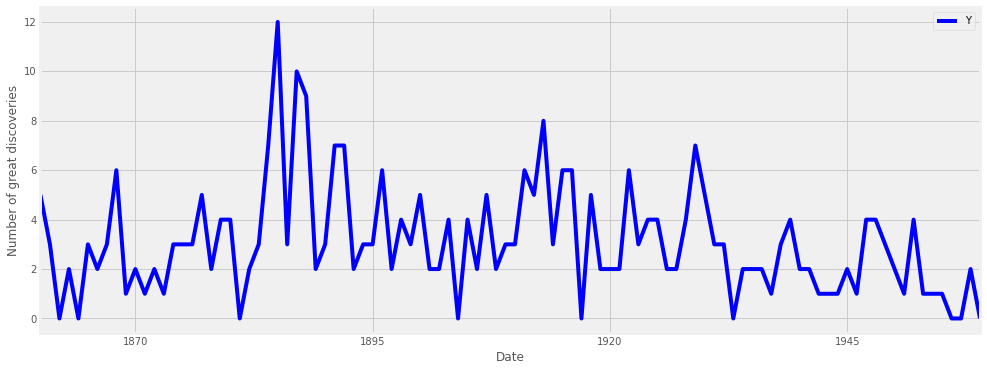

In [124]:
# Set the date column as the index of your DataFrame discoveries
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue',figsize=(15, 6))

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries');

### Specify plot styles

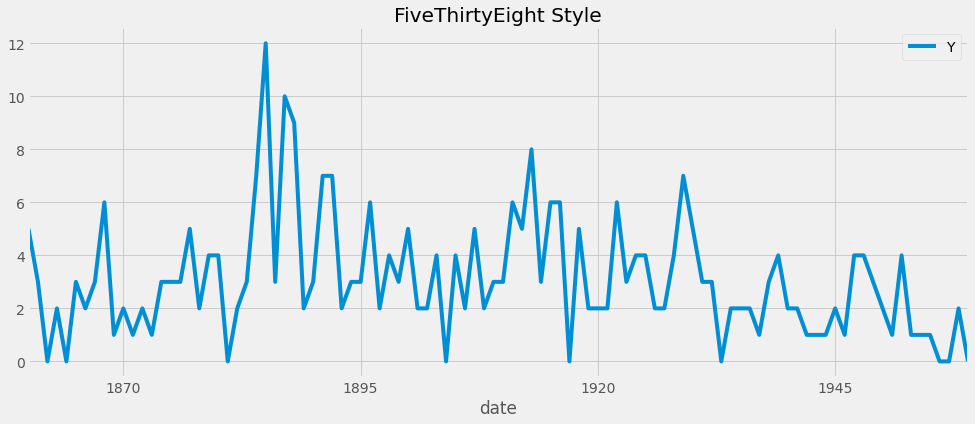

In [125]:
# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot(figsize=(15, 6))
ax1.set_title('FiveThirtyEight Style');

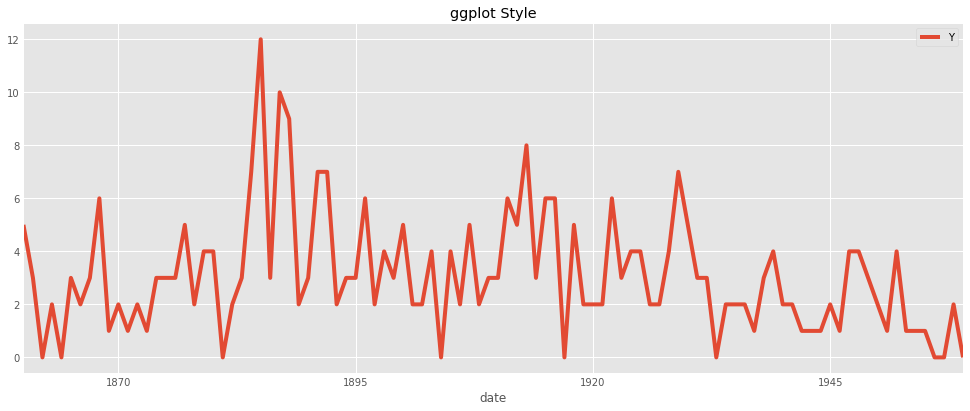

In [126]:
# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot(figsize=(15, 6))

# Set the title
ax2.set_title('ggplot Style');

### Display and label plots

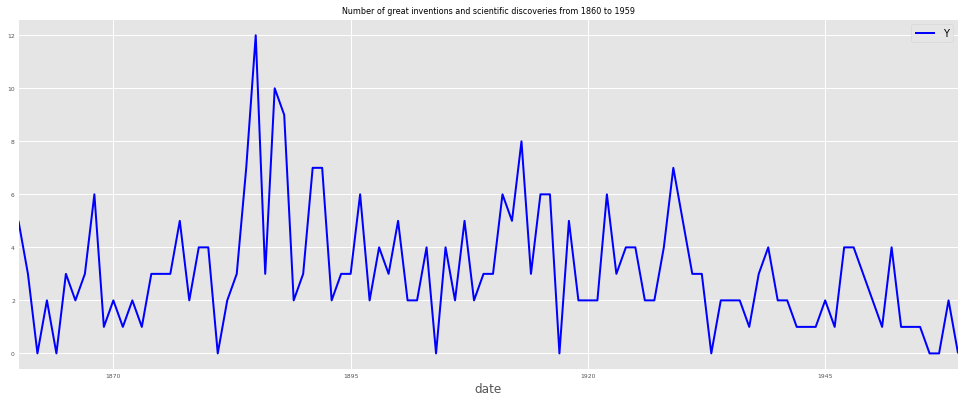

In [127]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(15, 6), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8);

### Subset time series data

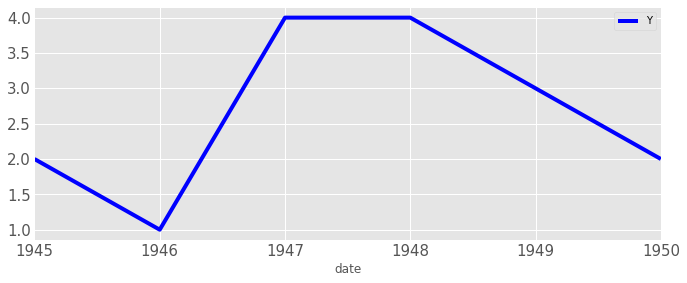

In [128]:
# Select the subset of data between 1945 and 1950
discoveries_subset_1 = discoveries['1945':'1950']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_1.plot(color='blue', fontsize=15,figsize=(10, 4));

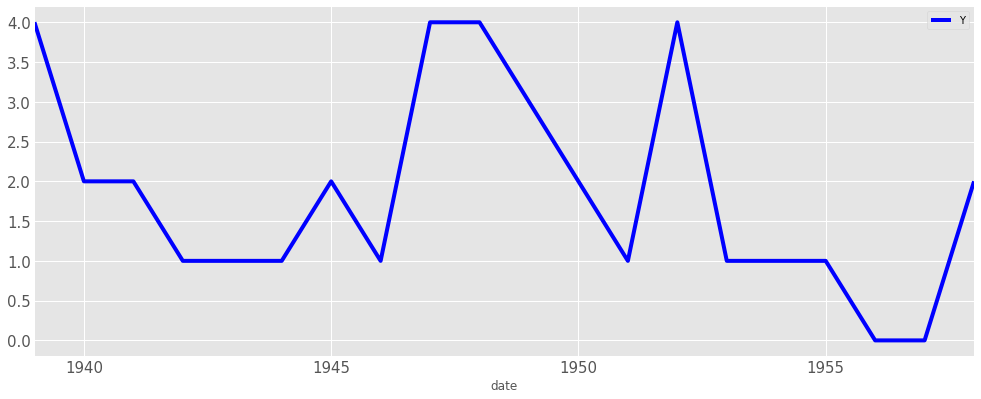

In [129]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1939':'1958']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15,figsize=(15, 6));

In [130]:
discoveries.head()

,Y
date,
1860-01-01,5
1861-01-01,3
1862-01-01,0
1863-01-01,2
1864-01-01,0


### Add vertical and horizontal markers

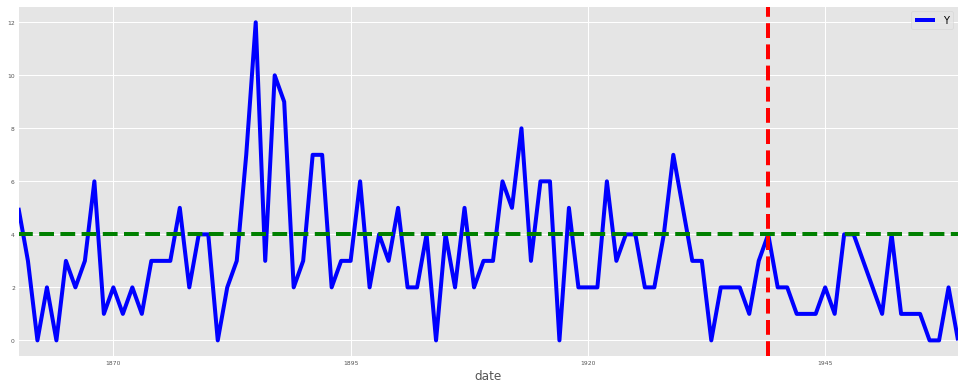

In [131]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6,figsize=(15, 6))

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(4, color='green', linestyle='--');

### Add shaded regions to your plot

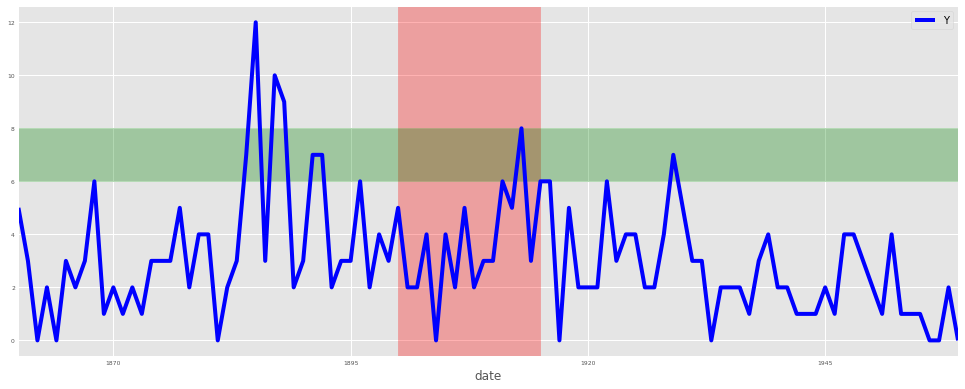

In [132]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6,figsize=(15, 6))

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=.3);

## Summary Statistics and Diagnostics


### Find missing values

In [133]:
co2_levels = pd.read_csv('ch2_co2_levels.csv')

In [134]:
# Display first seven rows of co2_levels
print(co2_levels.head(7))

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4
5  1958-05-03  316.9
6  1958-05-10    NaN


In [135]:
# Set datestamp column as index
co2_levels = co2_levels.set_index('datestamp')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


### Handle missing values

In [136]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    0
dtype: int64


### Display rolling averages

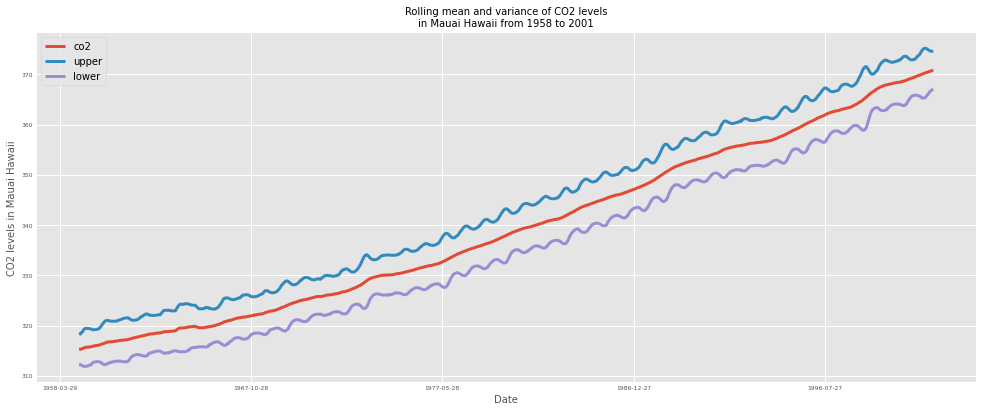

In [137]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=3, fontsize=6,figsize=(15, 6),)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show();

### Display aggregated values

In [138]:
co2_levels.dtypes

co2    float64
dtype: object

In [139]:
co2_levels.reset_index('datestamp',inplace=True)

In [140]:
co2_levels['datestamp'] = pd.to_datetime(co2_levels.datestamp)

In [141]:
co2_levels.set_index('datestamp',inplace=True)

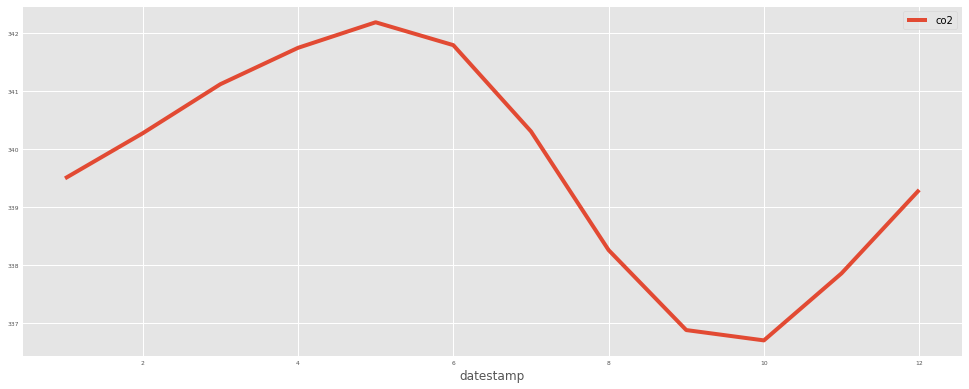

In [142]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6,figsize=(15, 6))

# Specify the fontsize on the legend
plt.legend(fontsize=10);

### Compute numerical summaries

In [143]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


### Boxplots and Histograms

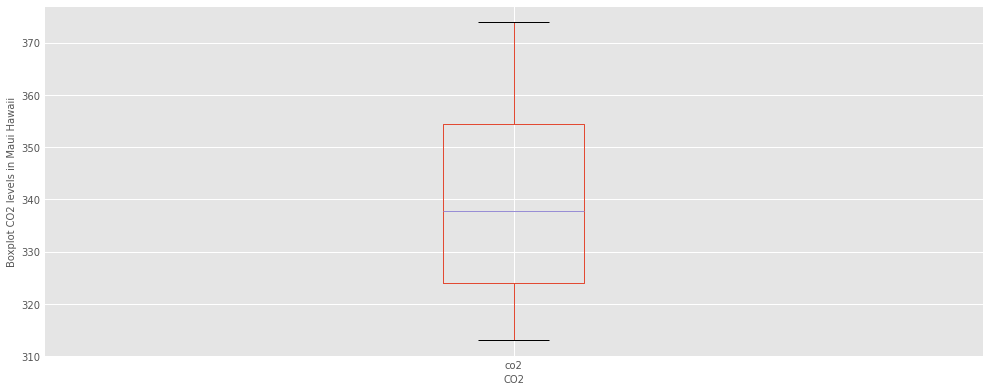

In [144]:
# Generate a boxplot
ax = co2_levels.boxplot(figsize=(15, 6))

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10);

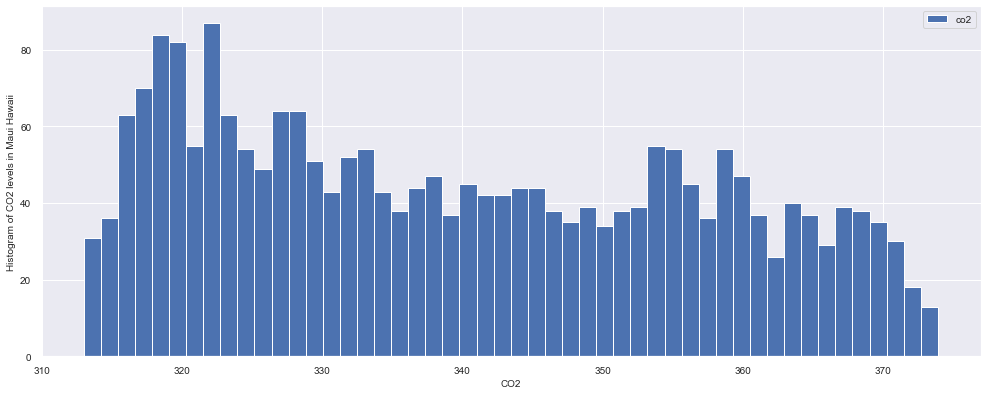

In [204]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=10,figsize=(15, 6))

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show();

### Density plots

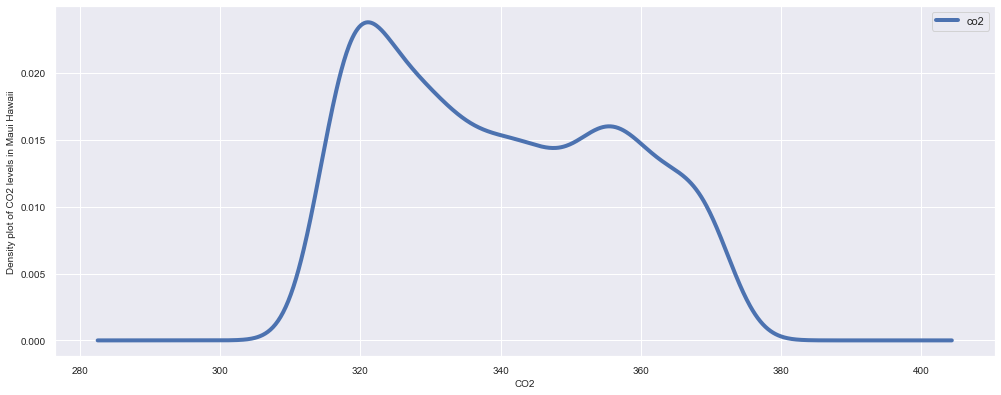

In [203]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=10,figsize=(15, 6))

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show();

## Seasonality, Trend and Noise


### Autocorrelation in time series data

<Figure size 864x576 with 0 Axes>

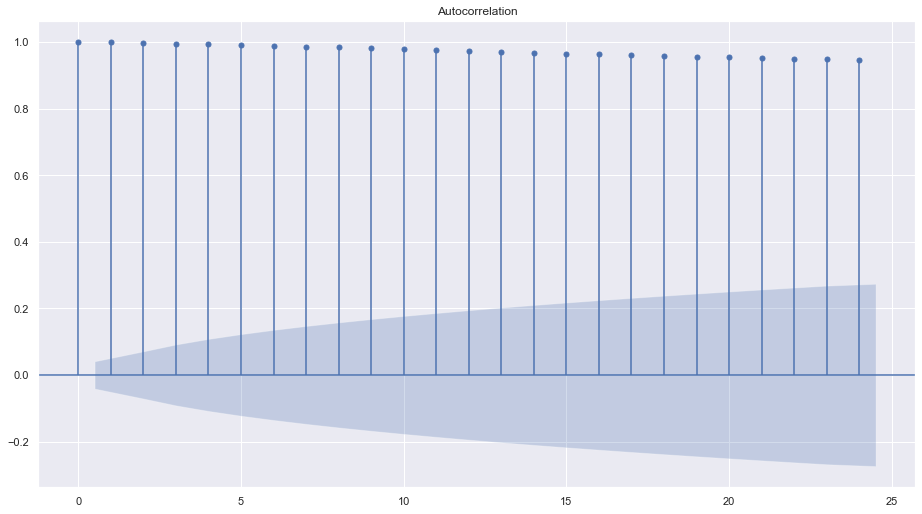

In [206]:
# Import required libraries


fig = plt.figure(figsize=(12,8))
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show();

In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.



They are highly correlated and statistically significant.


the autocorrelation values are not beyond the confidence intervals (the blue shaded regions)

the correlations (check the lines and their corresponding values on the Y axis) are not greater than 0.5


### Partial autocorrelation in time series data

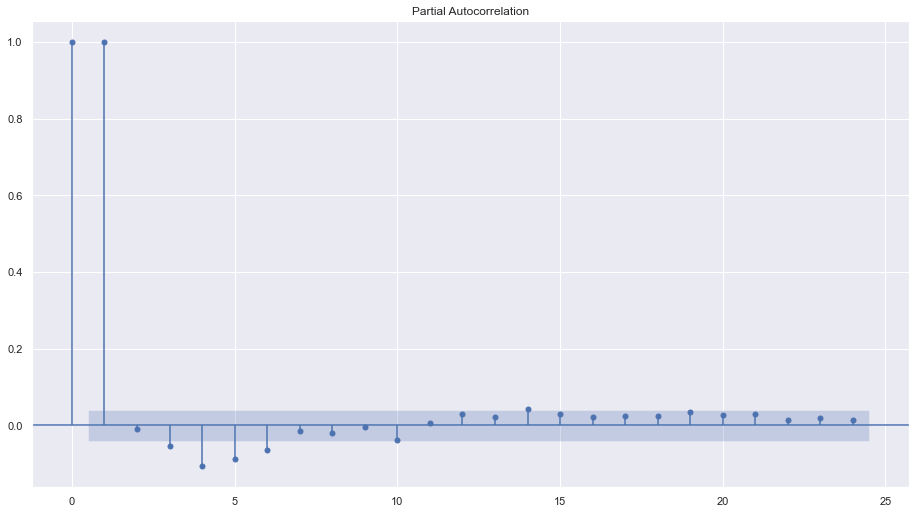

In [207]:
# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

at which lag values do we have statistically significant partial autocorrelations?

0, 1, 4,5,6 = there are the additional lag values that are beyond the confidence intervals.

### Time series decomposition

In [149]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


### Plot individual components

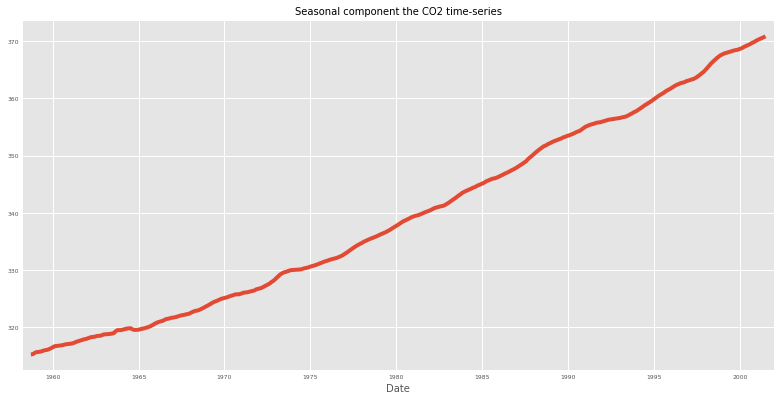

In [150]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

### Visualize the airline dataset

In [151]:
airline = pd.read_csv('ch3_airline_passengers.csv')
airline.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


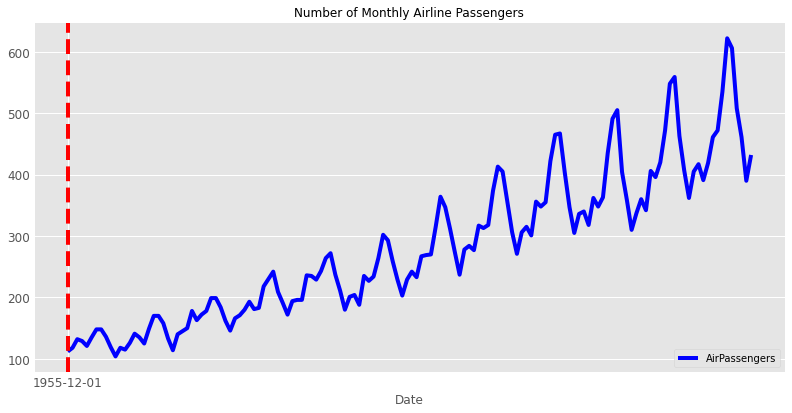

In [152]:
# Plot the time series in your dataframe
ax = airline.plot(color='blue', fontsize=12,figsize=(12, 6))

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

### Analyze the airline dataset

In [153]:
# Print out the number of missing values
print(airline.isnull().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

Month            0
AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


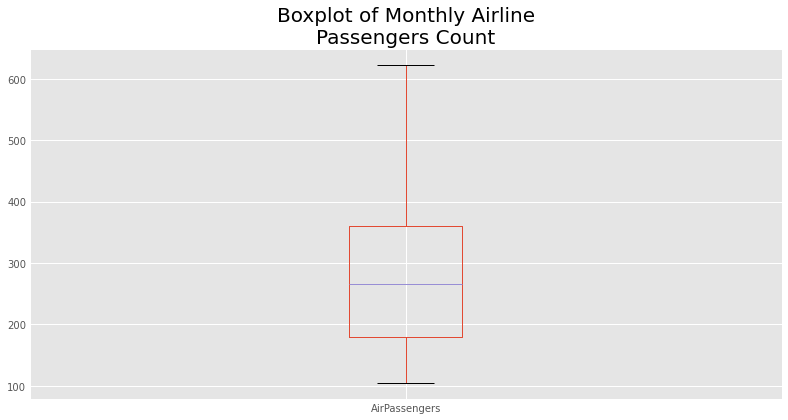

In [154]:
# Display boxplot of airline values
ax = airline.boxplot(figsize=(12, 6))

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

In [155]:
airline['Month'] = pd.to_datetime(airline.Month)

In [156]:
airline.set_index('Month', inplace=True)

In [157]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

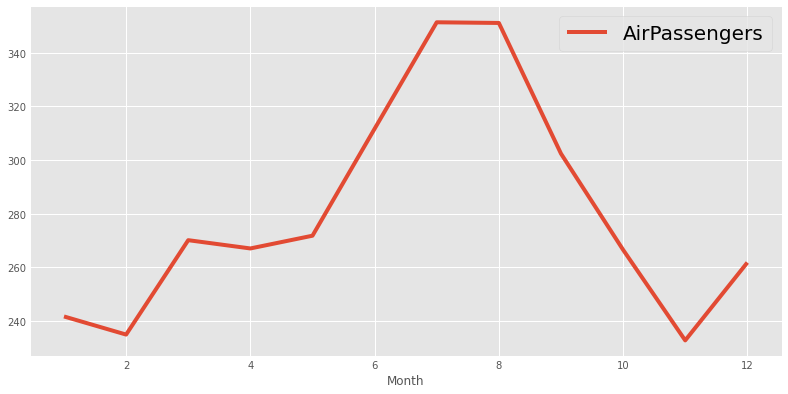

In [158]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot(figsize=(12, 6))
plt.legend(fontsize=20)
plt.show()

Looks like July and August are the busiest months!

### Time series decomposition of the airline dataset

In [159]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

In [160]:
import numpy as np

In [161]:
airline_decomposed = pd.DataFrame(np.c_[trend, seasonal], index=airline.index, columns=['trend', 'seasonal'])
airline_decomposed.head()

,trend,seasonal
Month,,
1949-01-01,NaN,-24.748737
1949-02-01,NaN,-36.188131
1949-03-01,NaN,-2.241162
1949-04-01,NaN,-8.036616
1949-05-01,NaN,-4.506313


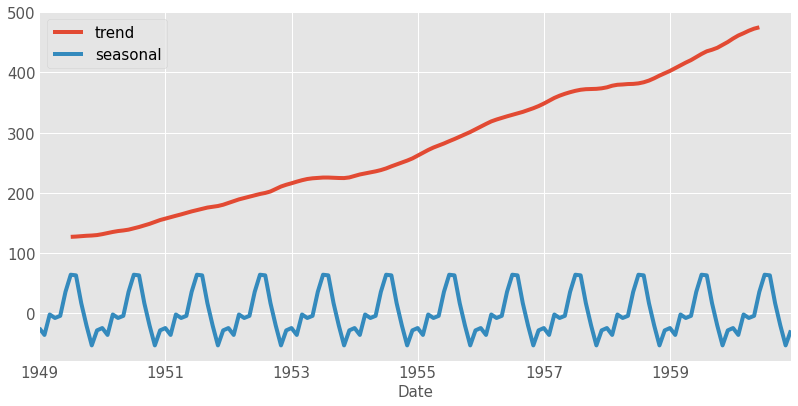

In [162]:
# Plot the values of the df_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

## Work with Multiple Time Series

### Load multiple time series

In [163]:
# Read in meat DataFrame
meat = pd.read_csv('ch4_meat.csv')

# Review the first five lines of the meat DataFrame
display(meat.head(5))

# Convert the date column to a datestamp type
meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
meat.describe()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
count,827.000000,827.000000,827.000000,827.000000,635.000000,143.000000,635.000000
mean,1683.463362,54.198549,1211.683797,38.360701,1516.582520,43.033566,292.814646
std,501.698480,39.062804,371.311802,19.624340,963.012101,3.867141,162.482638
min,366.000000,8.800000,124.000000,10.900000,250.900000,32.300000,12.400000
25%,1231.500000,24.000000,934.500000,23.000000,636.350000,40.200000,154.150000
50%,1853.000000,40.000000,1156.000000,31.000000,1211.300000,43.400000,278.300000
75%,2070.000000,79.000000,1466.000000,55.000000,2426.650000,45.650000,449.150000
max,2512.000000,215.000000,2210.400000,109.000000,3383.800000,51.100000,585.100000


### Visualize multiple time series

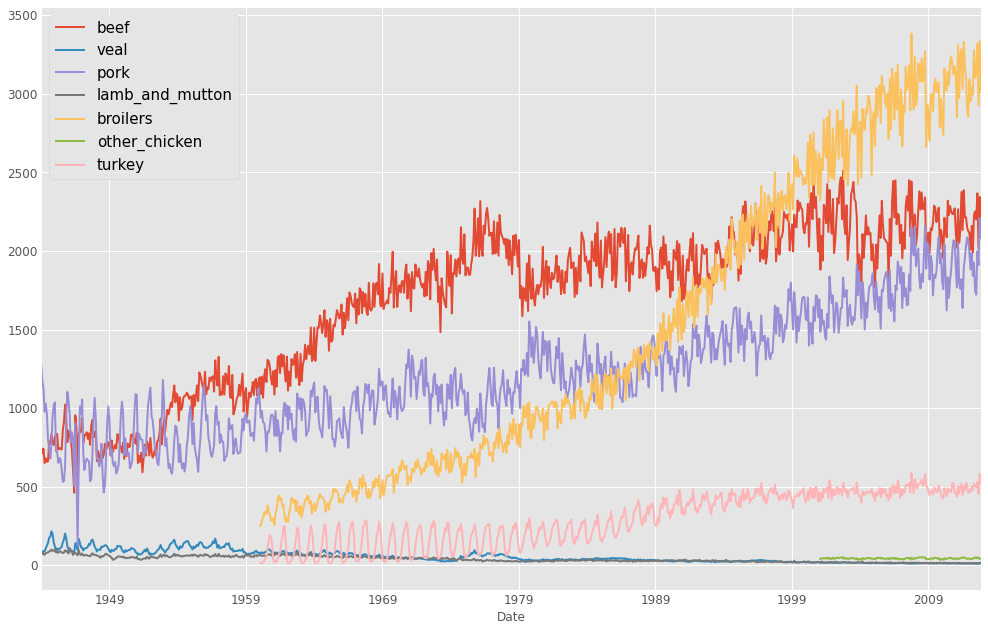

In [164]:
# Plot time series dataset
ax = meat.plot(fontsize=12, linewidth=2, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

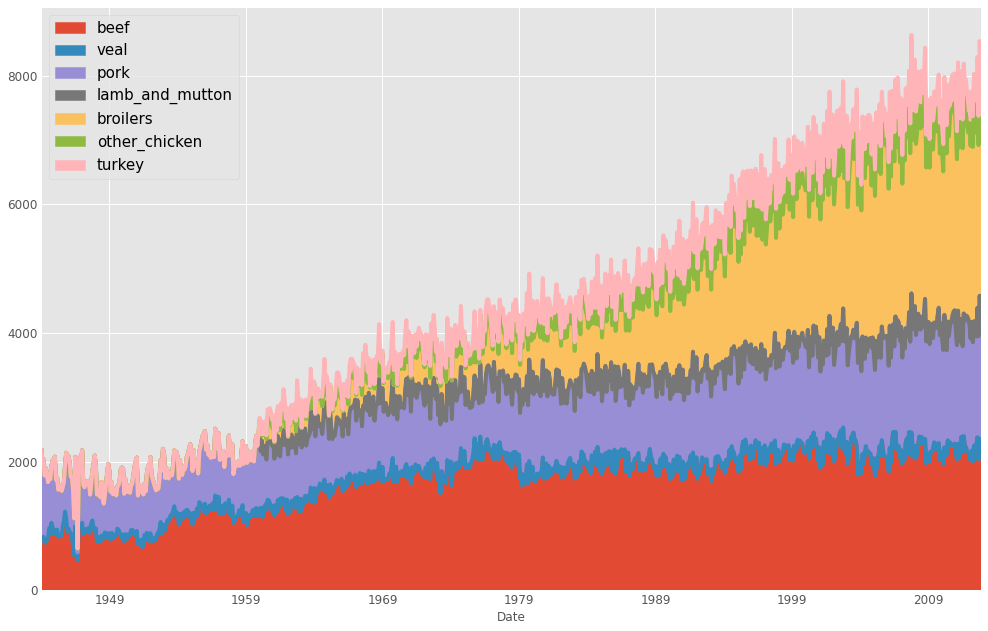

In [165]:
# Plot an area chart
ax = meat.plot.area(fontsize=12, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

### Define the color palette of your plots

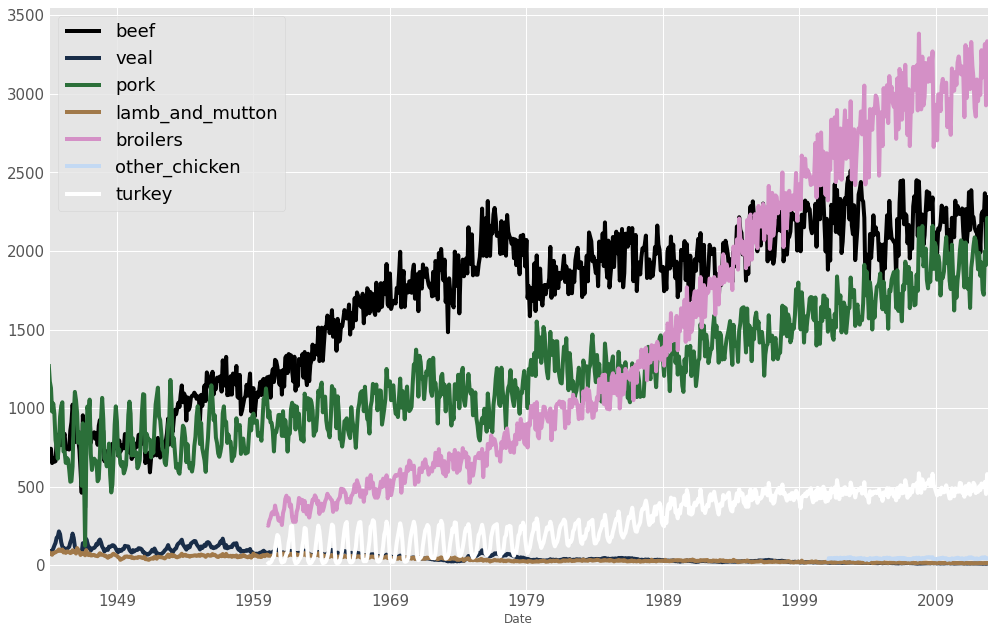

In [166]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='cubehelix', fontsize=15, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

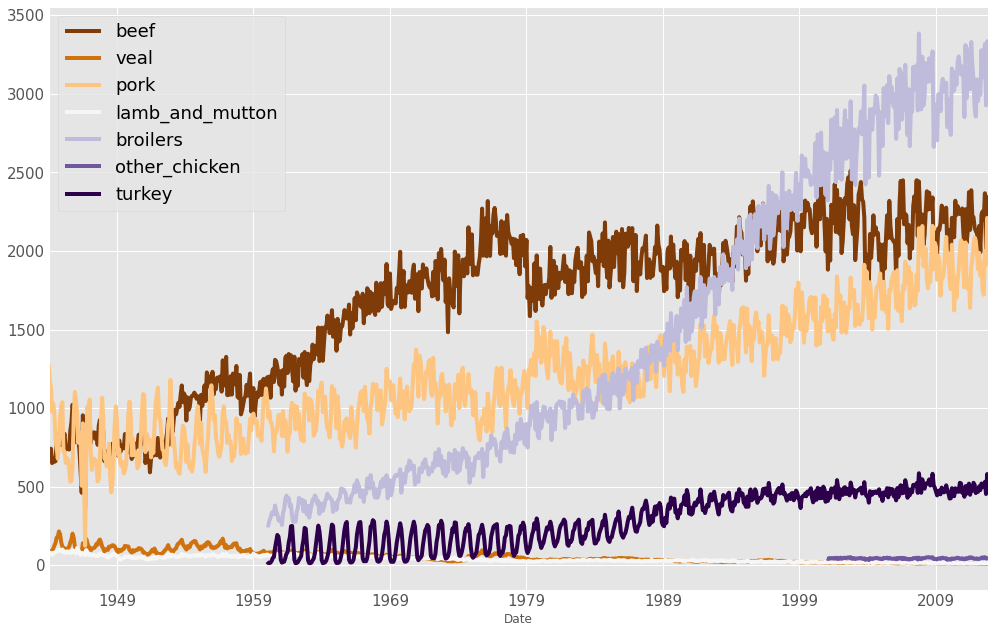

In [167]:
# Plot time series dataset using the cubehelix color palette
ax = meat.plot(colormap='PuOr', fontsize=15, figsize=(15,10))

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

### Add summary statistics to your time series plot

In [168]:
des = meat.describe().loc['mean']
meat_mean = pd.DataFrame([des.values], columns=des.index.values, index=['mean'])
meat_mean

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
mean,1683.463362,54.198549,1211.683797,38.360701,1516.58252,43.033566,292.814646


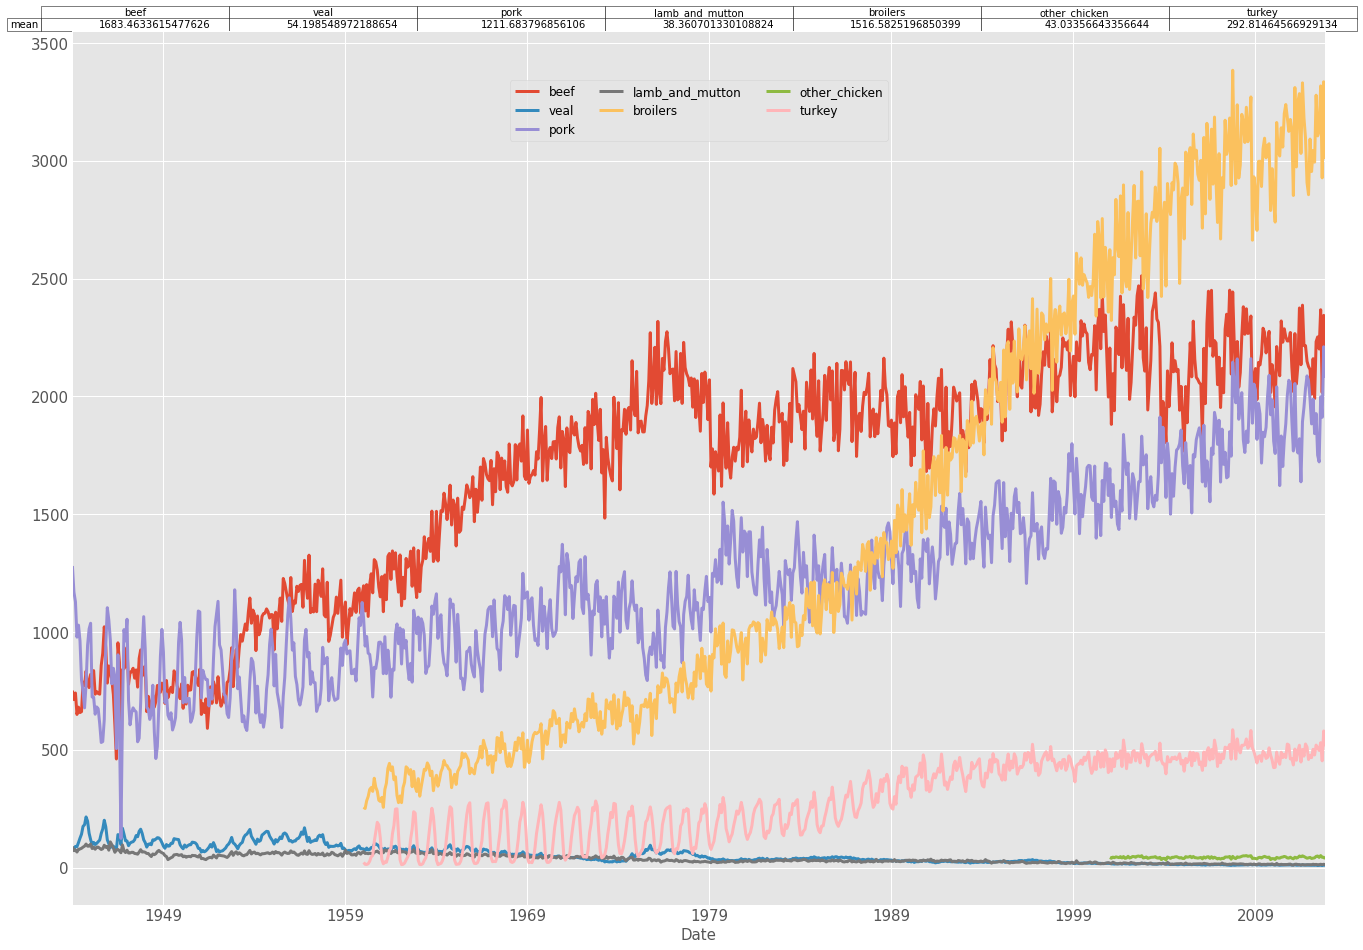

In [169]:
# Plot the meat data
ax = meat.plot(fontsize=15, linewidth=3,figsize=(20,15))

# Add x-axis labels
ax.set_xlabel('Date', fontsize=15)

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index.values,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=12)

# Show plot
plt.show()

### Plot your time series on individual plots

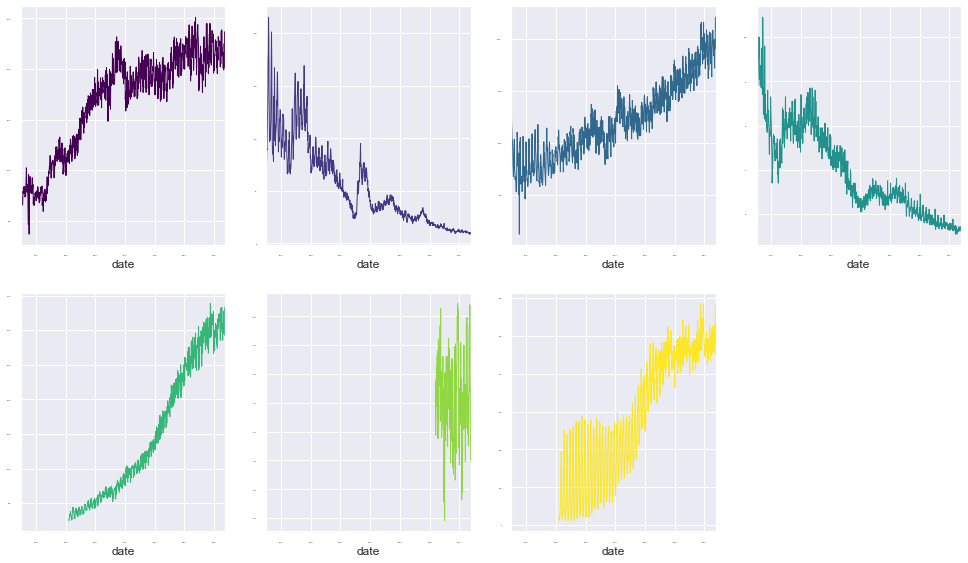

In [201]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True,
          figsize=(15,9),
          layout=(2,4), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=2, 
          legend=False, 
          linewidth=1)

plt.show()

### Compute correlations between time series

the pearson method should be used when relationships between your variables are thought to be linear, while the kendall and spearman methods should be used when relationships between your variables are thought to be non-linear.

In [171]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.827587)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.827587


In [172]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr('pearson'))

# Print the correlation between veal and pork columns
print(-0.808834)

# Print the correlation between veal and turkey columns
print(-0.768366)

# Print the correlation between pork and turkey columns
print(0.835215)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.808834
-0.768366
0.835215


### Visualize correlation matrices

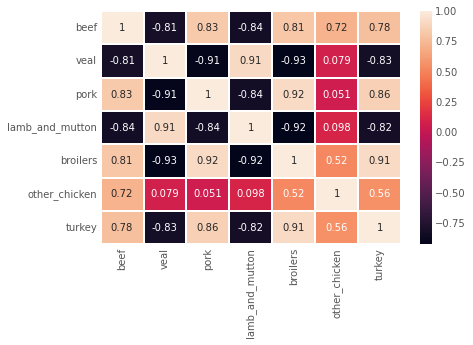

In [173]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

### Clustered heatmaps

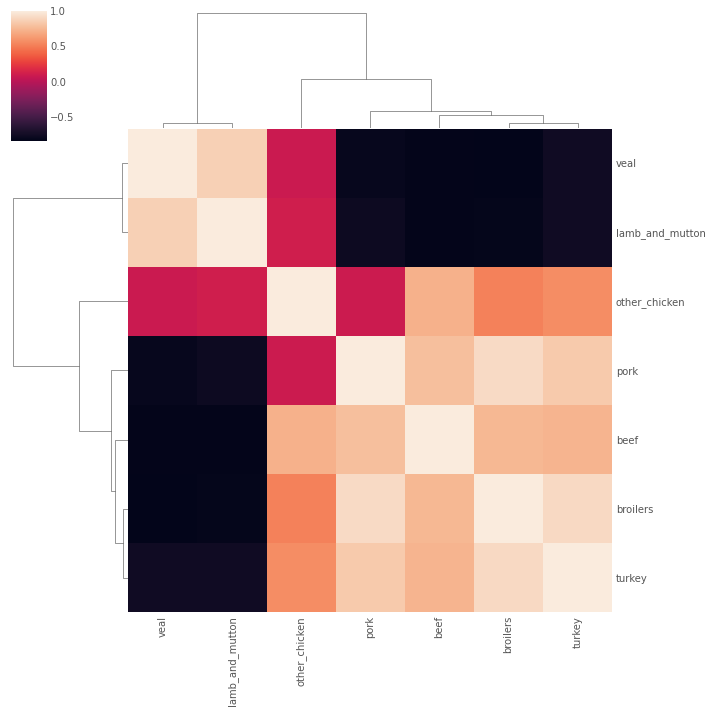

In [174]:
# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr('pearson')

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

## Case Study

<AxesSubplot:xlabel='veal', ylabel='lamb_and_mutton'>

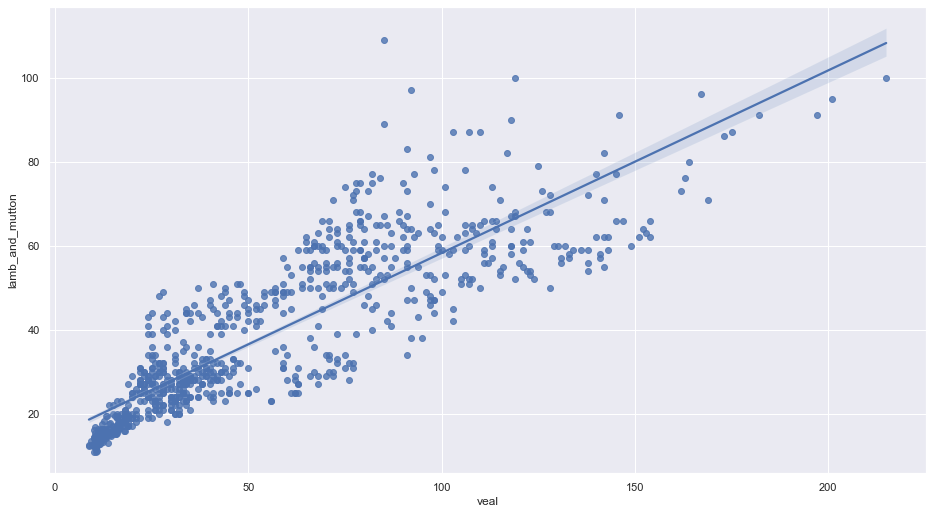

In [200]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,8)})
sns.regplot(x=meat["veal"], y=meat["lamb_and_mutton"])

### Explore the Jobs dataset

In [187]:
jobs = pd.read_csv('ch5_employment.csv')
jobs.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


In [188]:
jobs.tail()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5
121,2010-02-01,18.8,12.0,27.1,13.6,5.6,7.5,4.0,10.0,12.7,12.1,10.7,9.7,9.9,6.5,10.5,10.0


In [189]:
# Review the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object
Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information         

### Describe time series data with boxplots

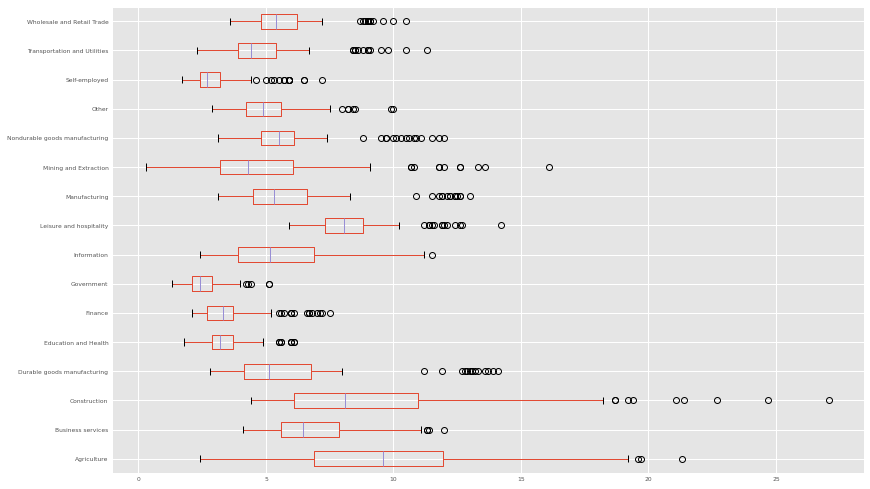

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [190]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False,figsize=(12,8))
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print(9.840984)

# Print the name of the time series with the highest variability
print(4.587619)

### Plot all the time series in your dataset

,Finance,Information,Manufacturing,Construction
datestamp,,,,
2000-01-01,2.7,3.4,3.6,9.7
2000-02-01,2.8,2.9,3.4,10.6
2000-03-01,2.6,3.6,3.6,8.7
2000-04-01,2.3,2.4,3.7,5.8
2000-05-01,2.2,3.5,3.4,5.0


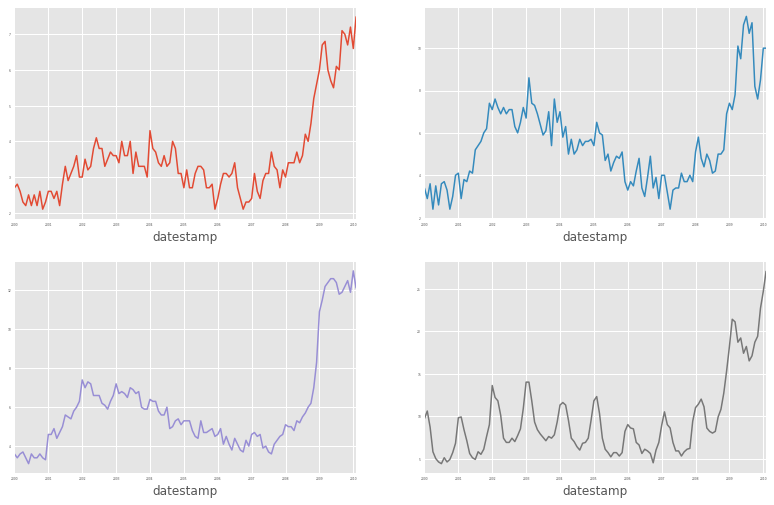

In [199]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
display(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=1.5,
                      fontsize=3,
                      legend=False,figsize=(12,8))

plt.show()

### Annotate significant events in time series data

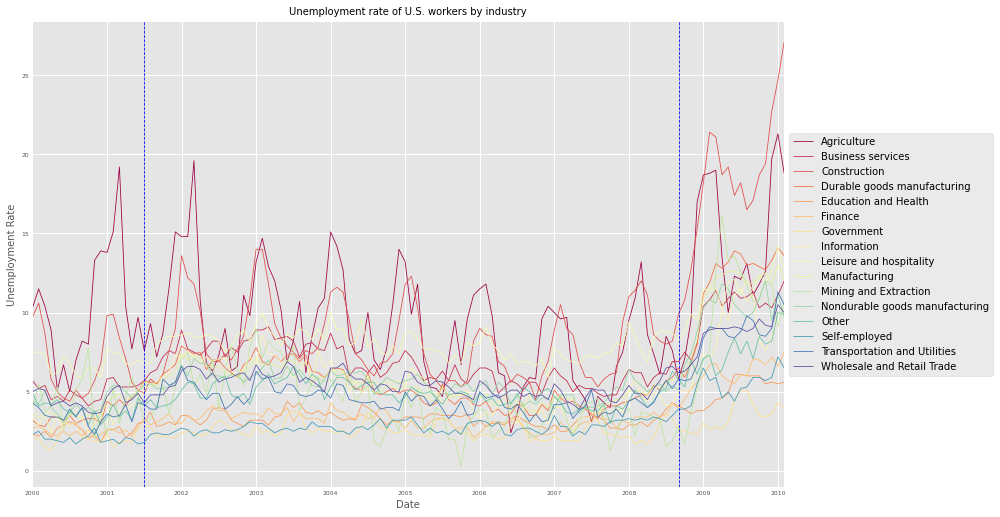

In [193]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8,figsize=(12,8))

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

### Plot monthly and yearly trends

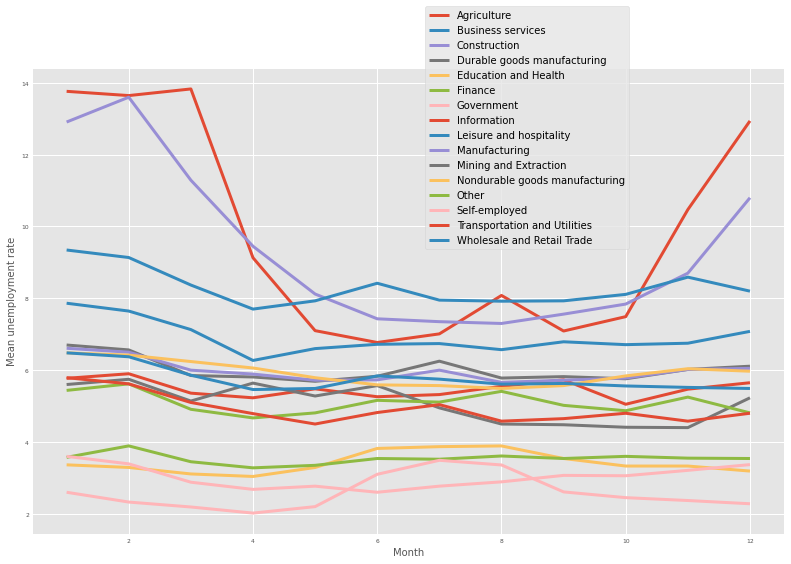

In [194]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=3,figsize=(12,8))

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show();

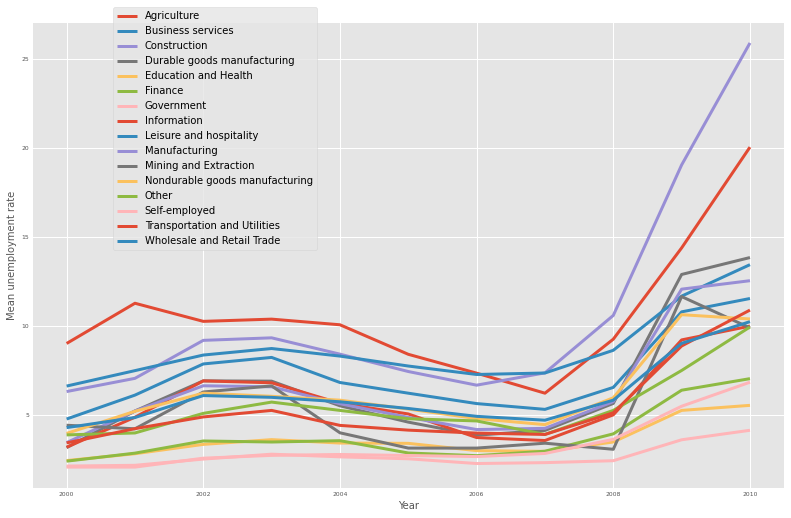

In [195]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=3,figsize=(12,8))

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show();

Averaging time series values by month shows that unemployment rate tends to be a lot higher during the winter months for the Agriculture and Construction industry. The increase in unemployment rate after 2008 is very clear when average time series values by year.

### Apply time series decomposition to your dataset

In [196]:
# Initialize dictionary
jobs_decomp = {}

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition

### Visualize the seasonality of multiple time series

In [197]:
jobs_seasonal = {}

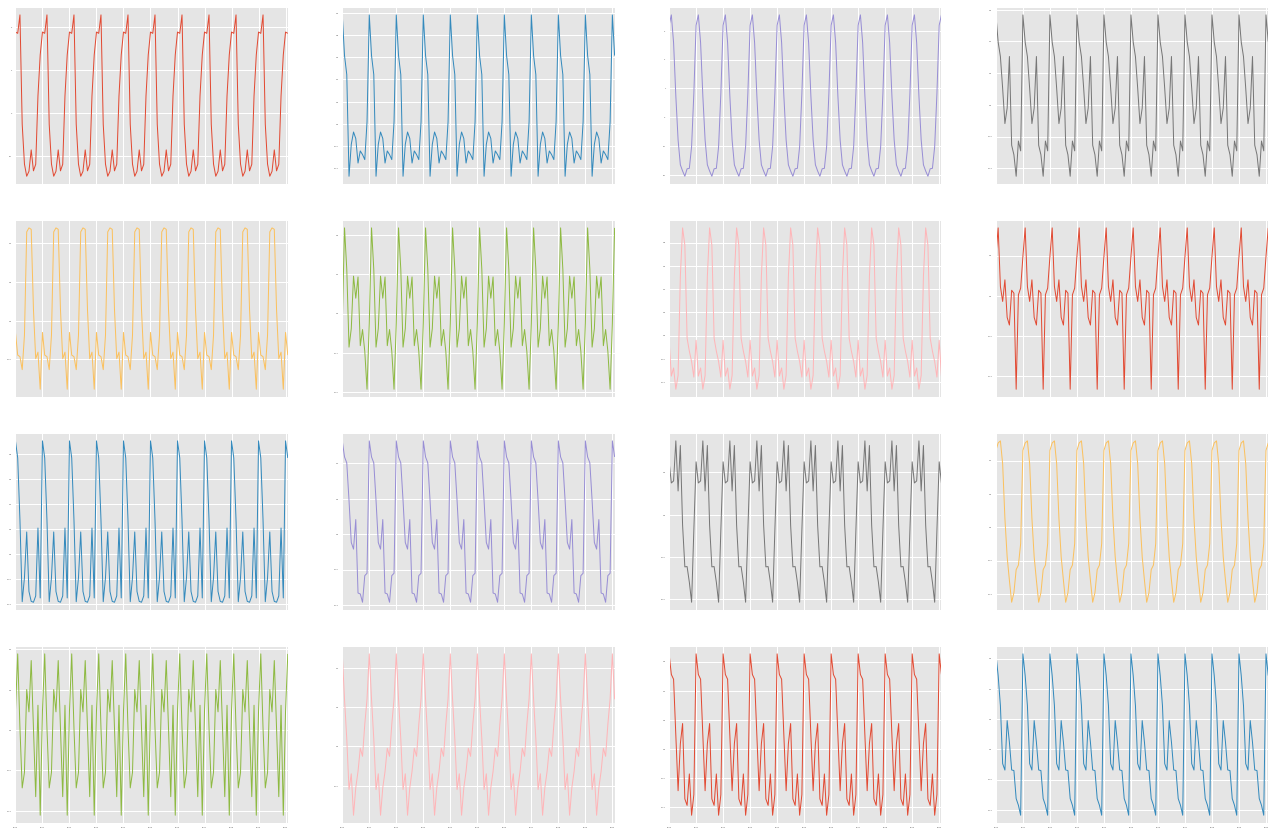

In [198]:
# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal
    
# Create a DataFrame from the jobs_seasonal dictionnary
seasonality_df = pd.DataFrame(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   figsize=(20,14),
                   sharey=False,
                   fontsize=2,
                   linewidth=1,
                   legend=False)

# Show plot
plt.show()